In [414]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [415]:
Variables=symbols("x1 y1 x2 y2")
x1,y1,x2,y2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("alpha beta gamma delta w a0 a1 omega")
alpha,beta,gamma,delta,w,a0,a1,omega = Parameters

In [416]:
F=Matrix([y1, gamma*cos(omega*t) - delta*y1 - beta*x1 - alpha*x1**3,
          y2, gamma*cos(omega*t) - delta*y2 - beta*x2 - alpha*x2**3])
F

⎡                y₁                ⎤
⎢                                  ⎥
⎢      3                           ⎥
⎢- α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(ω⋅t)⎥
⎢                                  ⎥
⎢                y₂                ⎥
⎢                                  ⎥
⎢      3                           ⎥
⎣- α⋅x₂  - β⋅x₂ - δ⋅y₂ + γ⋅cos(ω⋅t)⎦

In [417]:
zeta=Matrix([0,0,
             0,0])

zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [418]:
phi=Matrix([(x2-x1*a1*sin(w*t)),y2-y1])
phi

⎡-a₁⋅x₁⋅sin(t⋅w) + x₂⎤
⎢                    ⎥
⎣      -y₁ + y₂      ⎦

In [419]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-a₁⋅sin(t⋅w)  0   1  0⎤
⎢                      ⎥
⎣     0        -1  0  1⎦

In [420]:
on_manifold = [(x2,x1*(a1*sin(w*t))),(y2,y1)]

### Invariance

In [421]:
NF=N*(F+zeta)
NF

⎡          -a₁⋅y₁⋅sin(t⋅w) + y₂           ⎤
⎢                                         ⎥
⎢    3       3                            ⎥
⎣α⋅x₁  - α⋅x₂  + β⋅x₁ - β⋅x₂ + δ⋅y₁ - δ⋅y₂⎦

In [422]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅x₁⋅cos(t⋅w)⎤
⎢                 ⎥
⎣        0        ⎦

In [423]:
eqn=(NF+dPhi)
simplify(eqn)

⎡ -a₁⋅w⋅x₁⋅cos(t⋅w) - a₁⋅y₁⋅sin(t⋅w) + y₂ ⎤
⎢                                         ⎥
⎢    3       3                            ⎥
⎣α⋅x₁  - α⋅x₂  + β⋅x₁ - β⋅x₂ + δ⋅y₁ - δ⋅y₂⎦

In [424]:
zeta[2]=-(eqn)[0]
zeta[3]=-(eqn)[1]

simplify(zeta)

⎡                     0                     ⎤
⎢                                           ⎥
⎢                     0                     ⎥
⎢                                           ⎥
⎢  a₁⋅w⋅x₁⋅cos(t⋅w) + a₁⋅y₁⋅sin(t⋅w) - y₂   ⎥
⎢                                           ⎥
⎢      3       3                            ⎥
⎣- α⋅x₁  + α⋅x₂  - β⋅x₁ + β⋅x₂ - δ⋅y₁ + δ⋅y₂⎦

In [425]:
zeta=zeta.subs(on_manifold)
zeta

⎡                          0                          ⎤
⎢                                                     ⎥
⎢                          0                          ⎥
⎢                                                     ⎥
⎢       a₁⋅w⋅x₁⋅cos(t⋅w) + a₁⋅y₁⋅sin(t⋅w) - y₁        ⎥
⎢                                                     ⎥
⎢  3     3    3                               3       ⎥
⎣a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅x₁⋅sin(t⋅w) - α⋅x₁  - β⋅x₁⎦

In [426]:
NF=N*(F+zeta)
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡0⎤
⎢ ⎥
⎣0⎦

In [427]:
NZ=N*zeta
NZ

⎡       a₁⋅w⋅x₁⋅cos(t⋅w) + a₁⋅y₁⋅sin(t⋅w) - y₁        ⎤
⎢                                                     ⎥
⎢  3     3    3                               3       ⎥
⎣a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅x₁⋅sin(t⋅w) - α⋅x₁  - β⋅x₁⎦

### Stability

In [428]:
chi=Matrix([0,0,
           -(y2-y1)**3,-(x2-x1*a1*sin(w*t))**2])
chi

⎡           0            ⎤
⎢                        ⎥
⎢           0            ⎥
⎢                        ⎥
⎢                 3      ⎥
⎢      -(-y₁ + y₂)       ⎥
⎢                        ⎥
⎢                       2⎥
⎣-(-a₁⋅x₁⋅sin(t⋅w) + x₂) ⎦

In [429]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡                         0                                  0         0  0⎤
⎢                                                                          ⎥
⎢                         0                                  0         0  0⎥
⎢                                                                          ⎥
⎢                   a₁⋅w⋅cos(t⋅w)                     a₁⋅sin(t⋅w) - 1  0  0⎥
⎢                                                                          ⎥
⎢    3     2    3                              2                           ⎥
⎣3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅sin(t⋅w) - 3⋅α⋅x₁  - β         0         0  0⎦

In [430]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡                 0                          0                   0            
⎢                                                                             
⎢                 0                          0                   0            
⎢                                                                             
⎢                                                  2                          
⎢                 0                    3⋅(-y₁ + y₂)              0            
⎢                                                                             
⎣2⋅a₁⋅(-a₁⋅x₁⋅sin(t⋅w) + x₂)⋅sin(t⋅w)        0        2⋅a₁⋅x₁⋅sin(t⋅w) - 2⋅x₂ 

       0       ⎤
               ⎥
       0       ⎥
               ⎥
              2⎥
 -3⋅(-y₁ + y₂) ⎥
               ⎥
       0       ⎦

In [431]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡      0        1         0        0 ⎤
⎢                                    ⎥
⎢        2                           ⎥
⎢- 3⋅α⋅x₁  - β  -δ        0        0 ⎥
⎢                                    ⎥
⎢      0        0         0        1 ⎥
⎢                                    ⎥
⎢                           2        ⎥
⎣      0        0   - 3⋅α⋅x₂  - β  -δ⎦

In [432]:
(del_F+del_zeta+del_chi)

⎡                                            0                                
⎢                                                                             
⎢                                              2                              
⎢                                      - 3⋅α⋅x₁  - β                          
⎢                                                                             
⎢                                                                             
⎢                                      a₁⋅w⋅cos(t⋅w)                          
⎢                                                                             
⎢    3     2    3                                                             
⎣3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + a₁⋅β⋅sin(t⋅w) + 2⋅a₁⋅(-a₁⋅x₁⋅sin(t⋅w) + x₂)⋅sin(t⋅w) 

                              1                                   0           
                                                                              
                                                   

In [433]:
diff(N,t)*N.transpose()

⎡  2                       ⎤
⎢a₁ ⋅w⋅sin(t⋅w)⋅cos(t⋅w)  0⎥
⎢                          ⎥
⎣           0             0⎦

In [434]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac.subs(on_manifold)

⎡                                   0                                      2  
⎢                                                                             
⎢      2     2    2          2 ⎛    2     2    2         ⎞    2               
⎣- 3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) - a₁ ⋅⎝3⋅a₁ ⋅α⋅x₁ ⋅sin (t⋅w) + β⎠⋅sin (t⋅w) - β  -2⋅δ

⎤
⎥
⎥
⎦

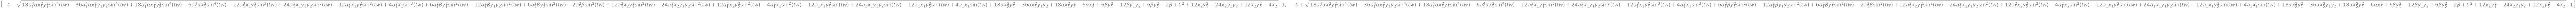

In [435]:
Jac.eigenvals()